Practice implementation for various predictive models

In [77]:
import pandas as pd
import numpy as np
from binance.client import Client
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
#Read in data
#https://github.com/binance/binance-public-data/

client = Client()

# Set the start date and current date
start_date = "1 Jan, 2020"
end_date = datetime.now().strftime("%d %b, %Y")

# Fetch the klines/candlestick data
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, start_date, end_date)

# Create a DataFrame
df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# Convert relevant columns to float
float_columns = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume']
df[float_columns] = df[float_columns].astype(float)

Part 1

In [79]:
df.head()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1577923199999,1.212145e+08,194010.0,8946.955535,6.459779e+07,0
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,1578009599999,2.259823e+08,302667.0,15141.611340,1.070608e+08,0
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,1578095999999,4.950986e+08,519854.0,35595.496273,2.577131e+08,0
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,1578182399999,2.198742e+08,279370.0,16369.382248,1.200351e+08,0
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,1578268799999,2.848487e+08,329209.0,19455.369564,1.446001e+08,0


In [80]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignore'],
      dtype='object')

In [81]:
df = df.drop(['ignore', 'close_time'], axis=1)

In [82]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1.212145e+08,194010.0,8946.955535,6.459779e+07
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,2.259823e+08,302667.0,15141.611340,1.070608e+08
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,4.950986e+08,519854.0,35595.496273,2.577131e+08
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,2.198742e+08,279370.0,16369.382248,1.200351e+08
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,2.848487e+08,329209.0,19455.369564,1.446001e+08


In [83]:
#Returns column
df['returns'] = np.log(df.close.pct_change() + 1)

In [84]:
#Define function for lags using returns
def lagit(df, lags):
    names = []
    for i in range(1, lags+1):
        df['Lag_' + str(i)] = df['returns'].shift(i)
        names.append('Lag_' + str(i))
    return names


In [85]:
lagnames = lagit(df, 5)

In [86]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
timestamp,,,,,,,,,,,,,,,
2020-01-01,7195.24,7255.0,7175.15,7200.85,16792.388165,1.212145e+08,194010.0,8946.955535,6.459779e+07,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7200.77,7212.5,6924.74,6965.71,31951.483932,2.259823e+08,302667.0,15141.611340,1.070608e+08,-0.033200,NaN,NaN,NaN,NaN,NaN
2020-01-03,6965.49,7405.0,6871.04,7344.96,68428.500451,4.950986e+08,519854.0,35595.496273,2.577131e+08,0.053015,-0.033200,NaN,NaN,NaN,NaN
2020-01-04,7345.00,7404.0,7272.21,7354.11,29987.974977,2.198742e+08,279370.0,16369.382248,1.200351e+08,0.001245,0.053015,-0.033200,NaN,NaN,NaN
2020-01-05,7354.19,7495.0,7318.00,7358.75,38331.085604,2.848487e+08,329209.0,19455.369564,1.446001e+08,0.000631,0.001245,0.053015,-0.0332,NaN,NaN


In [87]:
df.dropna(inplace=True)

In [88]:
lr = LinearRegression()

In [89]:
X = df[lagnames]
y = df['returns']
lr.fit(X, y)

LinearRegression()

In [90]:
df['prediction_LR'] = lr.predict(df[lagnames])
df['direction_LR'] = [1 if i>0 else -1 for i in df.prediction_LR]
df['strat_LR'] = df['direction_LR'] * df['returns']

np.exp(df[['returns', 'strat_LR']].sum())

returns      7.440280
strat_LR    30.713857
dtype: float64

<Axes: xlabel='timestamp'>

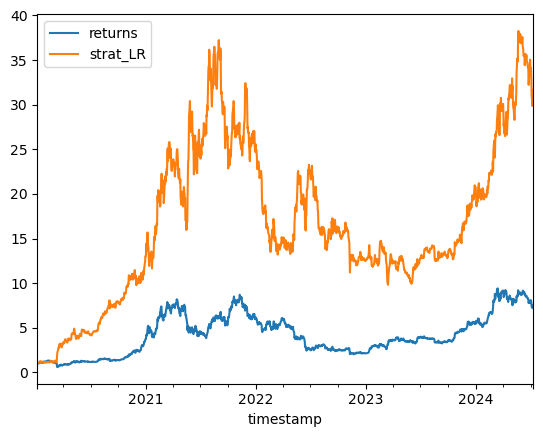

In [91]:
np.exp(df[['returns', 'strat_LR']].cumsum()).plot()

Part 2

In [92]:
#Train test split
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)

In [93]:
train = train.copy()
test = test.copy()

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(train[lagnames], train['returns'])

LinearRegression()

In [96]:
test['predictions_LR'] = lr.predict(test[lagnames]) #Make predictions using model on lags
test['direction_LR'] = [1 if i>0 else -1 for i in test.prediction_LR] #1 or -1 based on sign of predictions
test['strat_LR'] = test['direction_LR'] * test['returns'] #Return for given prediction

np.exp(test[['returns', 'strat_LR']].sum())

returns     1.976770
strat_LR    2.184859
dtype: float64

<Axes: xlabel='timestamp'>

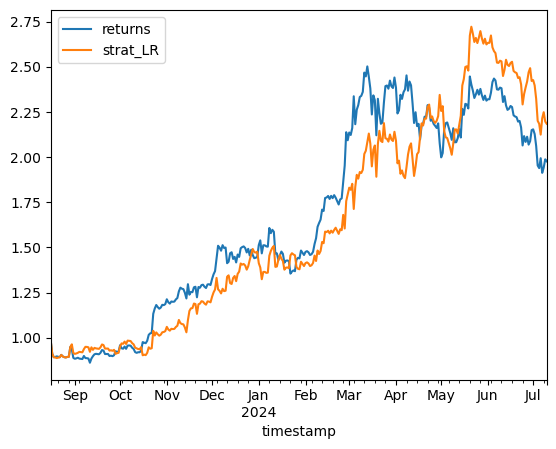

In [97]:
np.exp(test[['returns', 'strat_LR']].cumsum()).plot()

In [98]:


def get_next_date(df):
    last_date = df.index[-1]
    return last_date + timedelta(days=1)

def create_tomorrow_row(df, lagnames):
    tomorrow = get_next_date(df)
    new_row = pd.DataFrame(index = [tomorrow])

    for i, lag in enumerate(lagnames, 1):
        new_row[lag] = df['returns'].iloc[-1]
    return new_row

In [99]:
tomorrow_row = create_tomorrow_row(df, lagnames)
df.tail()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,returns,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR,direction_LR,strat_LR
timestamp,,,,,,,,,,,,,,,,,,
2024-07-06,56628.79,58475.00,56018.00,58230.13,21651.31558,1.235399e+09,1411065.0,11083.50401,6.327240e+08,0.027885,-0.007411,-0.053887,-0.031502,-0.012229,0.002037,-0.001248,-1,-0.027885
2024-07-07,58230.13,58449.46,55724.37,55857.81,19118.93918,1.094136e+09,1289229.0,9081.66872,5.198304e+08,-0.041594,0.027885,-0.007411,-0.053887,-0.031502,-0.012229,-0.003616,-1,0.041594
2024-07-08,55857.81,58236.73,54260.16,56714.62,48090.20490,2.699943e+09,2554389.0,23963.90684,1.346498e+09,0.015223,-0.041594,0.027885,-0.007411,-0.053887,-0.031502,0.001692,1,0.015223
2024-07-09,56714.61,58296.00,56289.45,58050.00,27732.20788,1.592351e+09,1757693.0,14143.25001,8.122493e+08,0.023273,0.015223,-0.041594,0.027885,-0.007411,-0.053887,-0.002552,-1,-0.023273
2024-07-10,58050.00,59470.00,57157.79,57721.69,24930.02399,1.451040e+09,1765333.0,12406.52246,7.222275e+08,-0.005672,0.023273,0.015223,-0.041594,0.027885,-0.007411,0.001768,1,-0.005672


In [100]:
columns_to_keep = lagnames + ['returns']
df2 = df[columns_to_keep].copy()

df2.tail()

,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,returns
timestamp,,,,,,
2024-07-06,-0.007411,-0.053887,-0.031502,-0.012229,0.002037,0.027885
2024-07-07,0.027885,-0.007411,-0.053887,-0.031502,-0.012229,-0.041594
2024-07-08,-0.041594,0.027885,-0.007411,-0.053887,-0.031502,0.015223
2024-07-09,0.015223,-0.041594,0.027885,-0.007411,-0.053887,0.023273
2024-07-10,0.023273,0.015223,-0.041594,0.027885,-0.007411,-0.005672


In [101]:
next_date = df2.index[-1] + timedelta(days=1)
new_row = pd.DataFrame(index=[next_date], columns=df2.columns)

new_row['Lag_1'] = df2['returns'].iloc[-1]
new_row['Lag_2'] = df2['Lag_1'].iloc[-1]
new_row['Lag_3'] = df2['Lag_2'].iloc[-1]
new_row['Lag_4'] = df2['Lag_3'].iloc[-1]
new_row['Lag_5'] = df2['Lag_4'].iloc[-1]

new_row['returns'] = np.nan

df2 = pd.concat([df2, new_row])

df2.tail()



,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,returns
2024-07-07,0.027885,-0.007411,-0.053887,-0.031502,-0.012229,-0.041594
2024-07-08,-0.041594,0.027885,-0.007411,-0.053887,-0.031502,0.015223
2024-07-09,0.015223,-0.041594,0.027885,-0.007411,-0.053887,0.023273
2024-07-10,0.023273,0.015223,-0.041594,0.027885,-0.007411,-0.005672
2024-07-11,-0.005672,0.023273,0.015223,-0.041594,0.027885,NaN
